In [43]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
#nltk.download_shell()

In [45]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [46]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [47]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names = ['label','message'])

In [48]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [50]:
messages['length'] = messages['message'].apply(len)

In [51]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E776E7FB38>]],
      dtype=object)

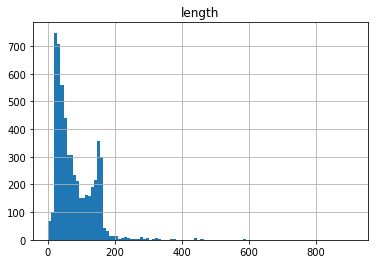

In [52]:
messages.hist(bins = 100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000E7777C0518>,
      dtype=object)

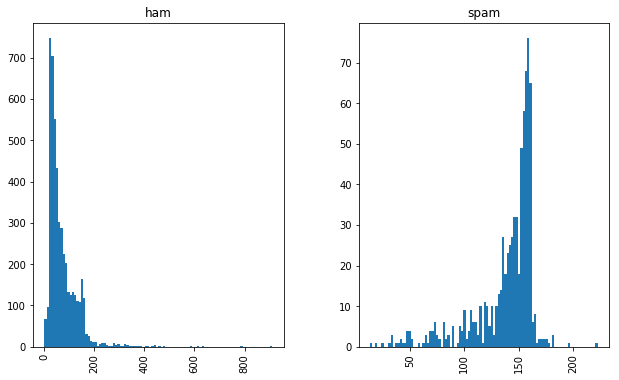

In [53]:
messages.hist('length', by = 'label',bins = 100,figsize = (10,6))

In [54]:
import string
from nltk.corpus import stopwords

In [55]:
def test_process(mess):
    
    """
    1. remove punct
    2. remove stop words.
    3. return list of clean text
    """
    npunct = [char for char in mess if mess not in string.punctuation]
    npunct = ''.join(npunct)
    return [word for word in npunct.split() if word.lower() not in stopwords.words('english')]
    

In [56]:
messages['message'].head(5).apply(test_process)

0    [Go, jurong, point,, crazy.., Available, bugis...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3    [U, dun, say, early, hor..., U, c, already, sa...
4      [Nah, think, goes, usf,, lives, around, though]
Name: message, dtype: object

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
bow_feat = CountVectorizer(analyzer=test_process).fit(messages['message'])

In [59]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [60]:
bow4 = bow_feat.transform([mess4])

In [61]:
print(bow4)

  (0, 5042)	2
  (0, 5760)	1
  (0, 6635)	1
  (0, 7936)	1
  (0, 7963)	1
  (0, 9331)	1
  (0, 12680)	1
  (0, 12684)	1


In [ ]:
bow_feat.get_feature_names()[5042]

'U'

In [ ]:
mee_bow = bow_feat.transform(messages['message'])

mee_bow.shape

In [ ]:
mee_bow.shape

In [ ]:
mee_bow.nnz

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer

In [77]:
tfidf_transformer = TfidfTransformer()

In [78]:
tfidf_transformer.fit(mee_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
bow_feat.vocabulary_['University']

In [ ]:
tfidf_transformer.idf_[5116]

In [79]:
message_tfidf = tfidf_transformer.transform(mee_bow)

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
spam_detec = MultinomialNB().fit(message_tfidf,messages['message'])

In [ ]:
all_pred = spam_detec.predict(message_tfidf)

In [82]:
from sklearn.cross_validation import train_test_split

In [ ]:
train_test_split()

In [83]:
(msg_train,msg_test,label_train,label_test) = train_test_split(messages['message'],messages['label'],test_size = 0.3)

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer = test_process)),
     ('tfidf',TfidfTransformer()),
    ('classifeir',MultinomialNB())
])

In [86]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function test_process at 0x000000E7767B7F28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifeir', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [87]:
predictions = pipeline.predict(msg_test)

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1449
       spam       1.00      0.65      0.79       223

avg / total       0.96      0.95      0.95      1672

